# Data Science and Business Analytics Internship
# The Spark Foundation
By Joyita Hazra

# Prediction Using Supervised Learning

# Task 1 - Predict the percentage of an student based on the no. of study hours

Importing Required Libraries

In [1]:
#Importing Python Modules Pandas, Numpy, Seaborn and MetaplotLib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Collecting Data

In [2]:
#Loading dataset(from remote URL) into variable df by using pandas
df = pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")

#To view first 5 rows of the dataset
df.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# To get the shape of the data i.e. Number of records and features present in the dataset
df.shape

(25, 2)

In [4]:
# To get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Info fetched about the data is as below
- number of records = 25 , number of features = 2
- There's no null value in this dataset

In [5]:
# To view basic Statistical details about the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


What info is fetched from these Statistical terms ?
- Count = total number of records present i.e. 25
- Mean = average value, Average study hours is 5 hrs/day and average scores are 51%
- Std = Standard Deviation measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
- min study hours is 1 hr/day, min scores are 17%
- max study hours is 9 hrs/day, max scores are 95%

# Visualization Using Scatterplot

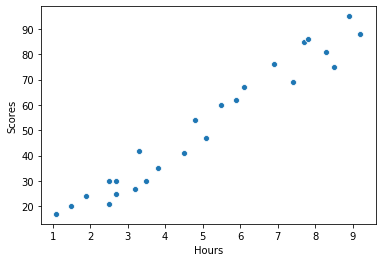

In [6]:
sns.scatterplot(x="Hours", y="Scores", data=df)

It's clearly visible from the graph that there is positive linear relationship between the attributes.

# Applying Linear Regression Model

In [7]:
#splitting attributes and target label
X = df.iloc[:,:-1]  #independent features
Y = df["Scores"]  #dependent feature or target 

In [8]:
print("Attributes")
X.head()              # To view first 5 records

Attributes


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [9]:
print("Labels")
Y.head()            # To view first 5 records

Labels


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Dividing the data into Training and Test Data

In [10]:
#SKLearn for train and test split
from sklearn.model_selection import train_test_split              
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
# To normalize the scale of the data between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [12]:
# To Import and Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions

In [13]:
Y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)

In [15]:
# To view Actual vs Predicted Results
df1.head()

,Actual,Predicted
5,20,12.919882
2,27,36.050347
19,69,93.196200
16,30,26.526038
11,62,72.786966


# Plotting Graph between Actual and Predicted Results

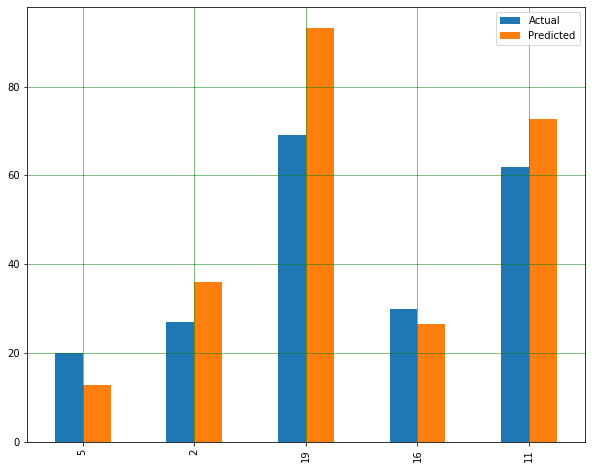

In [16]:
#To visualise the difference between Actual and Predicted Results
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Evaluating the Performance of the Model

In [17]:
# Evaluation Using Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R2 Score Values
from sklearn.metrics import *
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 10.917518550137498
Mean Squared Error: 169.1839954754094
Root Mean Squared Error: 13.007074823933682
R2 Score: 0.5730264600358131
